# Introduction

- Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kstest, norm
import scipy.stats as stats
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy import stats
from scipy.fft import rfft, rfftfreq

## 2 - Download the Data

- Download the data

In [56]:
BASE_PATH = os.path.join(os.getcwd(), "FORTH_TRACE_DATASET-master\FORTH_TRACE_DATASET-master")

def load_data(participant_id, device_id, base_path=BASE_PATH):
    filepath = os.path.join(base_path, f"part{participant_id}", f"part{participant_id}dev{device_id}.csv")
    data = np.genfromtxt(filepath, delimiter=',')
    return data



- Loading the data from only device 1 for each individual 

- [column 1: device ID,

   column 2: accelerometer x,

   column 3: accelerometer y,
   
   column 4: accelerometer z,
   
   column 5: gyroscope x,
   
   column 6: gyroscope y,
   
   column 7: gyroscope z,
   
   column 8: magnetometer x,
   
   column 9: magnetometer y,
   
   column 10: magnetometer z,
   
   column 11: TimeStamp,
   
   column 12: Activity Label]

- Each individual has different number of data (individuals[i])

- Number of individuals: 15

- Each individual has their respective TimeStamps start and end

In [57]:
individuals = []
for i in range(15): 
    data = load_data(i, 1)
    individuals.append(data)

print("Número de arrays: ",len(individuals),"\n")
print("Arrays: ",individuals)

Número de arrays:  15 

Arrays:  [array([[ 1.0000e+00, -1.8650e+00,  9.3890e+00, ...,  1.0134e+00,
         5.0589e+02,  1.0000e+00],
       [ 1.0000e+00, -1.7963e+00,  9.3742e+00, ...,  1.0000e+00,
         5.2542e+02,  1.0000e+00],
       [ 1.0000e+00, -1.8696e+00,  9.3000e+00, ...,  1.0156e+00,
         5.4495e+02,  1.0000e+00],
       ...,
       [ 1.0000e+00, -2.1324e+00,  9.3112e+00, ...,  5.4343e-01,
         1.0379e+06,  1.0000e+00],
       [ 1.0000e+00, -2.1327e+00,  9.3110e+00, ...,  5.5234e-01,
         1.0380e+06,  1.0000e+00],
       [ 1.0000e+00, -2.1334e+00,  9.2982e+00, ...,  5.4120e-01,
         1.0380e+06,  1.0000e+00]]), array([[ 1.0000e+00, -1.1173e+00,  9.6762e+00, ...,  4.6771e-02,
         8.7930e+02,  1.0000e+00],
       [ 1.0000e+00, -1.2130e+00,  9.7239e+00, ...,  5.7906e-02,
         8.9883e+02,  1.0000e+00],
       [ 1.0000e+00, -1.1892e+00,  9.7119e+00, ...,  6.4588e-02,
         9.1837e+02,  1.0000e+00],
       ...,
       [ 1.0000e+00, -1.3065e+00,  9.749

- Each array has different sizes, these is expected because they used continuos sensors

In [58]:
for i in range(len(individuals)):
    print(f"Tamanho do array {i}: ",len(individuals[i]))

Tamanho do array 0:  53120
Tamanho do array 1:  53376
Tamanho do array 2:  53248
Tamanho do array 3:  53268
Tamanho do array 4:  53120
Tamanho do array 5:  52861
Tamanho do array 6:  53632
Tamanho do array 7:  52480
Tamanho do array 8:  52992
Tamanho do array 9:  52480
Tamanho do array 10:  51456
Tamanho do array 11:  52864
Tamanho do array 12:  53120
Tamanho do array 13:  52992
Tamanho do array 14:  53248


## 3 - Outliers Analysis and Handling

### 3.1 - Boxplot for each activity 

- Calculation of each vector module

• Column 2: accelerometer x

• Column 3: accelerometer y

• Column 4: accelerometer z

• Column 5: gyroscope x

• Column 6: gyroscope y

• Column 7: gyroscope z

• Column 8: magnetometer x

• Column 9: magnetometer y

• Column 10: magnetometer z

• Column 12: Activity Label

In [59]:
activities = {1:[],2:[],3:[],4:[]}

for i in range(len(individuals)):
    data = individuals[i]  
    for row in data:
        label = int(row[11])  
        if label in activities:
            accelerometer  = np.sqrt(row[1]**2 + row[2]**2 + row[3]**2)
            gyroscope = np.sqrt(row[4]**2 + row[5]**2 + row[6]**2)
            magnetometer  = np.sqrt(row[7]**2 + row[8]**2 + row[9]**2)

            activities[label].append((accelerometer,gyroscope,magnetometer))

print("Estrutura de activities: ",len(activities))

Estrutura de activities:  4


- Each activity has different data sizes

In [60]:
for key in activities:
    print(f"Número de dados da atividade {key}: ",len(activities[key]))

Número de dados da atividade 1:  162125
Número de dados da atividade 2:  85632
Número de dados da atividade 3:  83584
Número de dados da atividade 4:  141342


- Boxplot of sensors/activity

In [61]:
accelerometer_activity = []
gyroscope_activity = []
magnetometer_activity = []

for act in range(1, 5):
    acceloremeter_values  = [x[0] for x in activities[act]]
    gyroscope_values = [x[1] for x in activities[act]]
    magnetometer_values  = [x[2] for x in activities[act]]

    accelerometer_activity.append(acceloremeter_values)
    gyroscope_activity.append(gyroscope_values)
    magnetometer_activity.append(magnetometer_values)

print("Tamanho dos dados do accelerometro: ",len(accelerometer_activity))
print("Tamanho dos dados do giroscópio: ",len(gyroscope_activity))
print("Tamanho dos dados do magnetómetro: ",len(magnetometer_activity))

Tamanho dos dados do accelerometro:  4
Tamanho dos dados do giroscópio:  4
Tamanho dos dados do magnetómetro:  4


- Each row of each activity for the accelerometer_activity has the (ax,ay,az) coordinates but all are consecutive, so i need to access three in three to be like activities dictionary

In [62]:
lenghts_acc= []
for i in range(len(accelerometer_activity)):
    lenghts_acc.append(len(accelerometer_activity[i]))

print(lenghts_acc)

[162125, 85632, 83584, 141342]


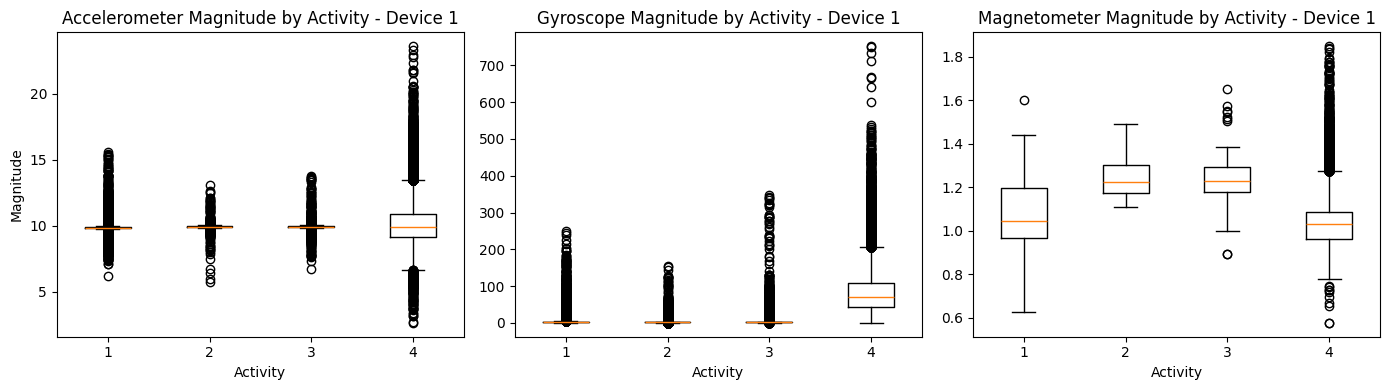

In [63]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.boxplot(accelerometer_activity)
plt.title("Accelerometer Magnitude by Activity - Device 1")
plt.xlabel("Activity")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 2)
plt.boxplot(gyroscope_activity)
plt.title("Gyroscope Magnitude by Activity - Device 1")
plt.xlabel("Activity")

plt.subplot(1, 3, 3)
plt.boxplot(magnetometer_activity)
plt.title("Magnetometer Magnitude by Activity - Device 1")
plt.xlabel("Activity")

plt.tight_layout()
plt.show()


### 3.2 - Analyse and Comment the Density of Outliers
- IQR Implementation

- Sort the lists of each sensor

In [64]:
accelerometer_activity_sorted = []

for i in range(len(accelerometer_activity)):
    sorted_values = sorted(accelerometer_activity[i])
    accelerometer_activity_sorted.append(sorted_values)

gyroscope_activity_sorted = []

for i in range(len(gyroscope_activity)):
    sorted_values = sorted(gyroscope_activity[i])
    gyroscope_activity_sorted.append(sorted_values)


magnetometer_activity_sorted = []

for i in range(len(magnetometer_activity)):
    sorted_values = sorted(magnetometer_activity[i])
    magnetometer_activity_sorted.append(sorted_values)

- Lenght of each sensor list

In [65]:
len_accelerometer = []

for i in range(len(accelerometer_activity_sorted)):
    len_accelerometer.append(len(accelerometer_activity_sorted[i]))


len_gyroscope = []

for i in range(len(gyroscope_activity_sorted)):
    len_gyroscope.append(len(gyroscope_activity_sorted[i]))


len_magnetometer = []

for i in range(len(magnetometer_activity_sorted)):
    len_magnetometer.append(len(magnetometer_activity_sorted[i]))


print("Accelerometer: ",len_accelerometer)
print("Gyroscope: ",len_gyroscope)
print("Magnetometer: ",len_magnetometer)

Accelerometer:  [162125, 85632, 83584, 141342]
Gyroscope:  [162125, 85632, 83584, 141342]
Magnetometer:  [162125, 85632, 83584, 141342]


In [66]:
Q1_acc = []
Q3_acc = []

for i in range(len(accelerometer_activity_sorted)):
    values = accelerometer_activity_sorted[i]     
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_acc.append(Q1_val)
    Q3_acc.append(Q3_val)


Q1_gyr = []
Q3_gyr = []

for i in range(len(gyroscope_activity_sorted)):
    values = gyroscope_activity_sorted[i]
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_gyr.append(Q1_val)
    Q3_gyr.append(Q3_val)


Q1_mag = []
Q3_mag = []

for i in range(len(magnetometer_activity_sorted)):
    values = magnetometer_activity_sorted[i]
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_mag.append(Q1_val)
    Q3_mag.append(Q3_val)


In [67]:
print("Q1 (acc): ",Q1_acc," Q3 (acc): ",Q3_acc)
print("Q1 (gyr): ",Q1_gyr," Q3 (gyr): ",Q3_gyr)
print("Q1 (mag): ",Q1_mag," Q3 (mag): ",Q3_mag)

Q1 (acc):  [9.819646410640253, 9.901181647157069, 9.883672002095173, 9.179633085362125]  Q3 (acc):  [9.870302200687677, 9.969197738113133, 9.940777034517975, 10.89105599130694]
Q1 (gyr):  [1.3965113863838314, 1.1622591618481655, 1.2700557673988524, 42.23248137752593]  Q3 (gyr):  [2.6834860928961377, 1.5489879470143055, 1.9141148821648422, 107.80765056800097]
Q1 (mag):  [0.9656947954601289, 1.1714641708767508, 1.1757712458930947, 0.9603195538311597]  Q3 (mag):  [1.1962697774540487, 1.301677157093859, 1.2948422088894886, 1.0854070396053244]


- IQR (lower and upper interval) for each sensor and each activity

In [68]:
k = 1.5 

IQR_acc = [Q3_acc[i] - Q1_acc[i] for i in range(len(Q1_acc))]
lower_acc = [Q1_acc[i] - k * IQR_acc[i] for i in range(len(IQR_acc))]
upper_acc = [Q3_acc[i] + k * IQR_acc[i] for i in range(len(IQR_acc))]

IQR_gyr = [Q3_gyr[i] - Q1_gyr[i] for i in range(len(Q1_gyr))]
lower_gyr = [Q1_gyr[i] - k * IQR_gyr[i] for i in range(len(IQR_gyr))]
upper_gyr = [Q3_gyr[i] + k * IQR_gyr[i] for i in range(len(IQR_gyr))]

IQR_mag = [Q3_mag[i] - Q1_mag[i] for i in range(len(Q1_mag))]
lower_mag = [Q1_mag[i] - k * IQR_mag[i] for i in range(len(IQR_mag))]
upper_mag = [Q3_mag[i] + k * IQR_mag[i] for i in range(len(IQR_mag))]


In [69]:
print(lower_acc,upper_acc)
print(lower_gyr,upper_gyr)
print(lower_mag,upper_mag)

[9.743662725569116, 9.799157510722972, 9.798014453460969, 6.612498726444903] [9.946285885758812, 10.071221874547229, 10.026434583152177, 13.458190350224163]
[-0.533950673384628, 0.5821659840989554, 0.30396709524986776, -56.13027240818663] [4.613948152664597, 2.1290811247635157, 2.8802035543138267, 206.17040435371354]
[0.6198323224692492, 0.9761446915510885, 0.9971648013985037, 0.7726883251699128] [1.5421322504449284, 1.4969966364195213, 1.4734486533840796, 1.2730382682665713]


Points that were classificated as outliers

In [70]:
outliers_acc = []

for i, values in enumerate(accelerometer_activity_sorted):
    outliers_i = [v for v in values if v < lower_acc[i] or v > upper_acc[i]]
    outliers_acc.append(outliers_i)

outliers_gyr = []
for i, values in enumerate(gyroscope_activity_sorted):
    outliers_i = [v for v in values if v < lower_gyr[i] or v > upper_gyr[i]]
    outliers_gyr.append(outliers_i)

outliers_mag = []
for i, values in enumerate(magnetometer_activity_sorted):
    outliers_i = [v for v in values if v < lower_mag[i] or v > upper_mag[i]]
    outliers_mag.append(outliers_i)

In [71]:
nr_outliers_acc = [len(outliers) for outliers in outliers_acc]
nr_outliers_gyr = [len(outliers) for outliers in outliers_gyr]
nr_outliers_mag = [len(outliers) for outliers in outliers_mag]

print("Número de outliers em acelerómetro (para cada atividade): ",nr_outliers_acc)
print("Número de outliers em giroscópio (para cada atividade): ",nr_outliers_gyr)
print("Número de outliers em magnetómetro (para cada atividade): ",nr_outliers_mag)

Número de outliers em acelerómetro (para cada atividade):  [9047, 532, 3285, 4556]
Número de outliers em giroscópio (para cada atividade):  [15149, 5448, 8188, 2691]
Número de outliers em magnetómetro (para cada atividade):  [1, 0, 9, 1541]


Outliers Density
- density = (nº of points classified as outliers/nº total points)*100

In [72]:
density_accelerometer = [(nr_outliers_acc[i] / len_accelerometer[i]) * 100 for i in range(len(nr_outliers_acc))]

density_gyroscope = [(nr_outliers_gyr[i] / len_gyroscope[i]) * 100 for i in range(len(nr_outliers_gyr))]

density_magnetometer = [(nr_outliers_mag[i] / len_magnetometer[i]) * 100 for i in range(len(nr_outliers_mag))]

print("Densidade de outliers do acelerómetro: ",density_accelerometer)
print("Densidade de outliers do giroscópio: ",density_gyroscope)
print("Densidade de outliers do magnetómetro: ",density_magnetometer)

Densidade de outliers do acelerómetro:  [5.5802621434078645, 0.6212630792227205, 3.930178024502297, 3.223387245121762]
Densidade de outliers do giroscópio:  [9.34402467232074, 6.362107623318386, 9.796133231240429, 1.9038926858258691]
Densidade de outliers do magnetómetro:  [0.0006168080185042406, 0.0, 0.01076761102603369, 1.0902633329088312]


### 3.3 - Z-Score Implementation

In [73]:
def zscore_sensor(sensor_data, k=3):

    z_scores_sensor = []
    outliers_sensor = []
    nr_outliers = []

    for values in sensor_data:
        n = len(values)
        if n == 0:
            z_scores_sensor.append([])
            outliers_sensor.append([])
            nr_outliers.append(0)
            continue

        mean = sum(values) / n
        variance = sum((x - mean) ** 2 for x in values) / n
        std_deviation = variance ** 0.5

        if std_deviation == 0:
            z_scores_sensor.append([0] * n)
            outliers_sensor.append([])
            nr_outliers.append(0)
            continue

        z_scores = [(x - mean) / std_deviation for x in values]
        outliers = [values[i] for i, z in enumerate(z_scores) if abs(z) > k]

        z_scores_sensor.append(z_scores)
        outliers_sensor.append(outliers)
        nr_outliers.append(len(outliers))

    return z_scores_sensor, outliers_sensor, nr_outliers


- Z-Score (K=3)

In [74]:
z_acc, out_acc, nr_out_acc = zscore_sensor(accelerometer_activity_sorted, k=3)
z_gyr, out_gyr, nr_out_gyr = zscore_sensor(gyroscope_activity_sorted, k=3)
z_mag, out_mag, nr_out_mag = zscore_sensor(magnetometer_activity_sorted, k=3)

print("Outliers do acelerómetro:", nr_out_acc)
print("Outliers do giroscópio:", nr_out_gyr)
print("Outliers do magnetómetro:", nr_out_mag)


Outliers do acelerómetro: [1401, 236, 523, 1530]
Outliers do giroscópio: [1963, 341, 434, 1329]
Outliers do magnetómetro: [8, 2, 10, 961]


- Z-Scpre (k=1.5)

In [75]:
z_acc, out_acc, nr_out_acc = zscore_sensor(accelerometer_activity_sorted, k=1.5)
z_gyr, out_gyr, nr_out_gyr = zscore_sensor(gyroscope_activity_sorted, k=1.5)
z_mag, out_mag, nr_out_mag = zscore_sensor(magnetometer_activity_sorted, k=1.5)

print("Outliers do acelerómetro:", nr_out_acc)
print("Outliers do giroscópio:", nr_out_gyr)
print("Outliers do magnetómetro:", nr_out_mag)


Outliers do acelerómetro: [2841, 1480, 1880, 15859]
Outliers do giroscópio: [3690, 597, 834, 13129]
Outliers do magnetómetro: [7706, 8163, 7018, 16489]


### 3.4 - Plot of Outliers using Z-Score (k=3, 3.5 and 4)

- Plot function (Accelerometer)


--- k = 3 ---
Stand: 1401 outliers
Sit: 236 outliers
Sit and Talk: 523 outliers
Walk: 1530 outliers


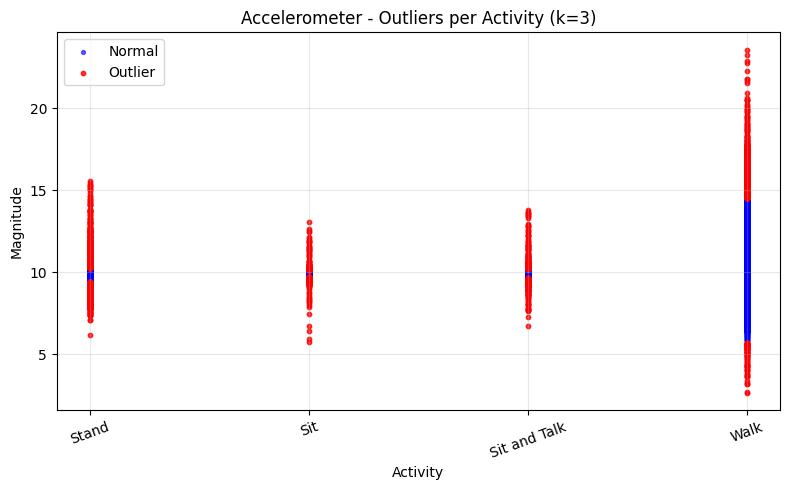


--- k = 3.5 ---
Stand: 1201 outliers
Sit: 182 outliers
Sit and Talk: 438 outliers
Walk: 700 outliers


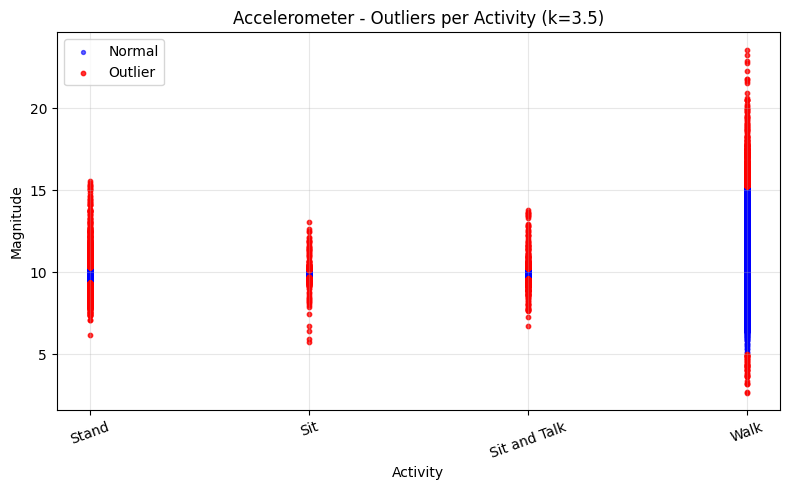


--- k = 4 ---
Stand: 1047 outliers
Sit: 150 outliers
Sit and Talk: 367 outliers
Walk: 368 outliers


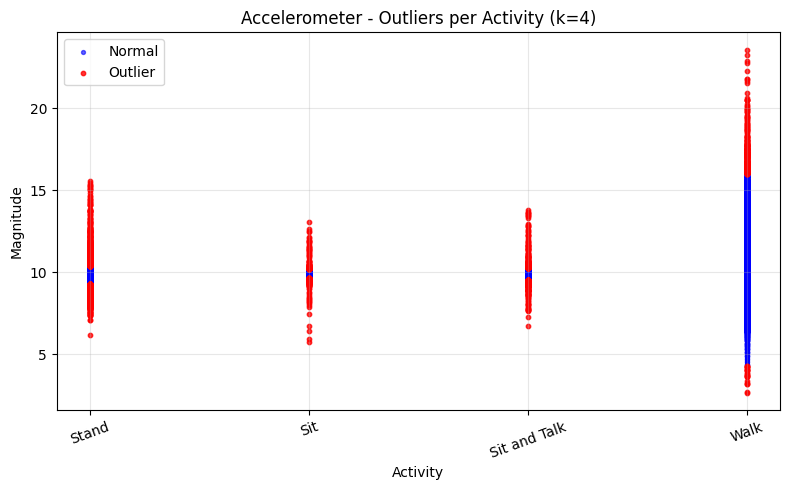

In [76]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_acc[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Accelerometer - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_acc[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- Plot function (Gyroscope)


--- k = 3 ---
Stand: 1963 outliers
Sit: 341 outliers
Sit and Talk: 434 outliers
Walk: 1329 outliers


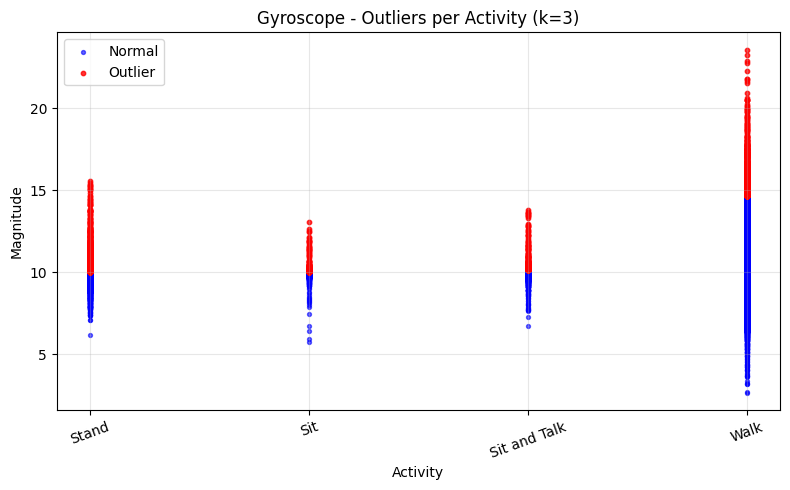


--- k = 3.5 ---
Stand: 1681 outliers
Sit: 304 outliers
Sit and Talk: 370 outliers
Walk: 712 outliers


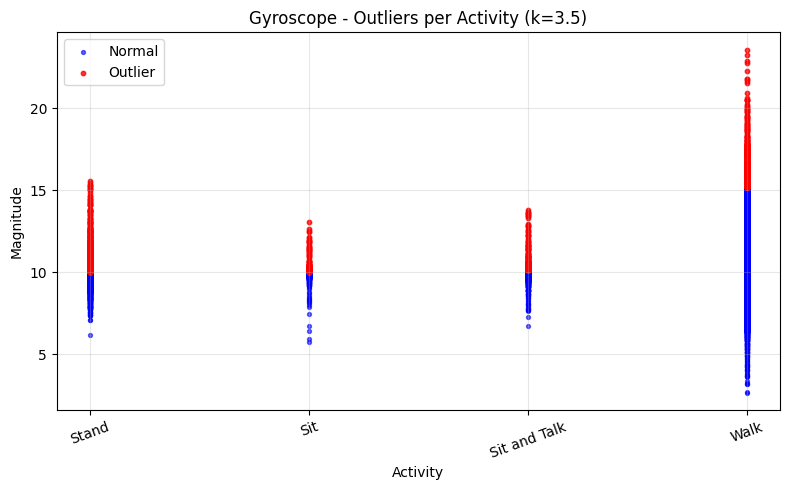


--- k = 4 ---
Stand: 1461 outliers
Sit: 276 outliers
Sit and Talk: 329 outliers
Walk: 437 outliers


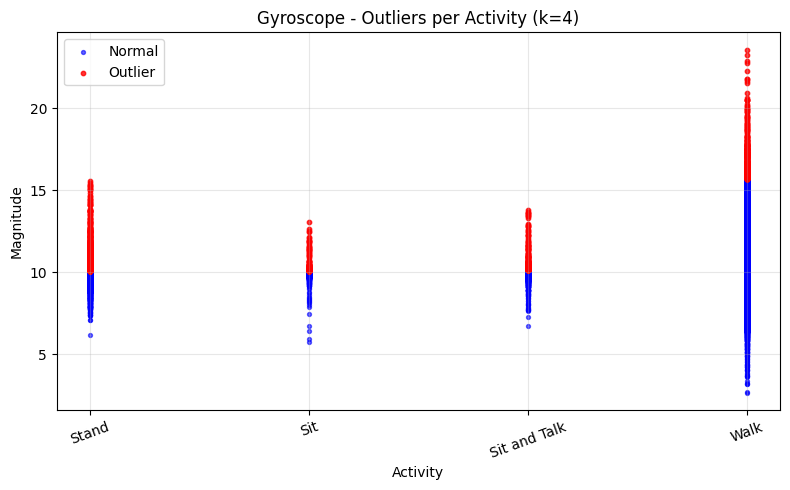

In [77]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_gyr[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Gyroscope - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_gyr[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- Plot function (Magnetometer)


--- k = 3 ---
Stand: 8 outliers
Sit: 2 outliers
Sit and Talk: 10 outliers
Walk: 961 outliers


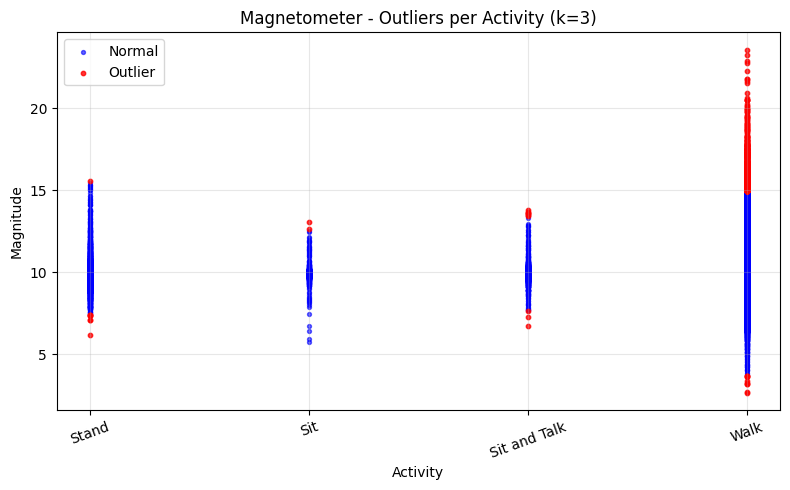


--- k = 3.5 ---
Stand: 6 outliers
Sit: 2 outliers
Sit and Talk: 10 outliers
Walk: 485 outliers


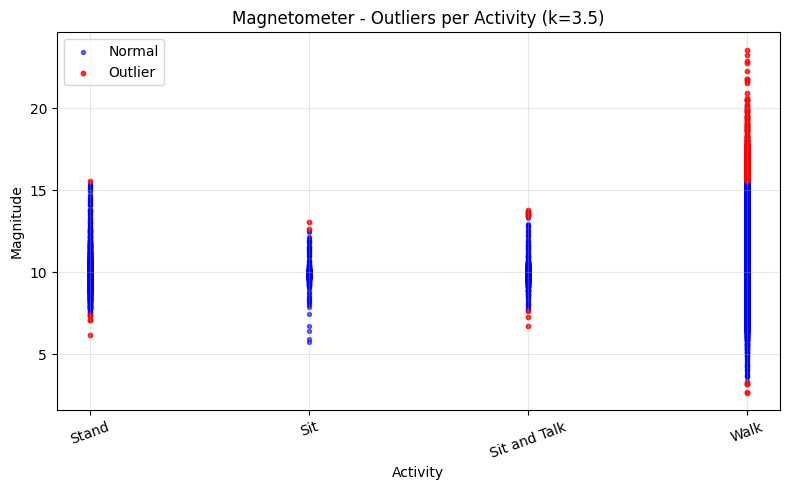


--- k = 4 ---
Stand: 1 outliers
Sit: 0 outliers
Sit and Talk: 9 outliers
Walk: 249 outliers


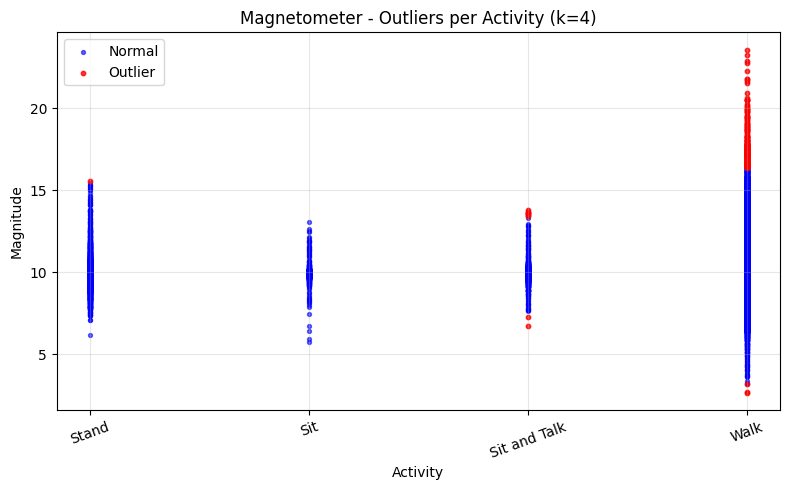

In [78]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_mag[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Magnetometer - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_mag[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


### 3.5 - Compare the results obtained on 3.1 and 3.4 and the outliers density (IQR vs Z-Score)

In [79]:
for i, valores in enumerate(accelerometer_activity_sorted):
    out_z = [idx for idx, z in enumerate(z_acc[i]) if abs(z) > 3]
    out_iqr = [idx for idx, v in enumerate(valores)
               if v < lower_acc[i] or v > upper_acc[i]]

    intersec = len(set(out_z) & set(out_iqr))
    only_z = len(set(out_z) - set(out_iqr))
    only_iqr = len(set(out_iqr) - set(out_z))

    print(f"Atividade {i+1}:")
    print(f"  Outliers comuns: {intersec}")
    print(f"  Só Z-Score: {only_z}")
    print(f"  Só Boxplot: {only_iqr}")


Atividade 1:
  Outliers comuns: 1401
  Só Z-Score: 0
  Só Boxplot: 7646
Atividade 2:
  Outliers comuns: 236
  Só Z-Score: 0
  Só Boxplot: 296
Atividade 3:
  Outliers comuns: 523
  Só Z-Score: 0
  Só Boxplot: 2762
Atividade 4:
  Outliers comuns: 1530
  Só Z-Score: 0
  Só Boxplot: 3026


### 3.6 - K-Means Implementation

- combined_data with the modules of acc,gyr and mag

In [ ]:
combined_data = []

for person_data in individuals:
    acc_mag = np.sqrt(person_data[:, 1]**2 + person_data[:, 2]**2 + person_data[:, 3]**2)
    gyro_mag = np.sqrt(person_data[:, 4]**2 + person_data[:, 5]**2 + person_data[:, 6]**2)
    mag_mag  = np.sqrt(person_data[:, 7]**2 + person_data[:, 8]**2 + person_data[:, 9]**2)
    activity_label = person_data[:, 11]
    combined = np.column_stack((acc_mag, gyro_mag, mag_mag, activity_label))
    combined_data.append(combined)

combined_data = np.vstack(combined_data)

'combined_data = []\n\nfor person_data in individuals:\n    acc_mag = np.sqrt(person_data[:, 1]**2 + person_data[:, 2]**2 + person_data[:, 3]**2)\n    gyro_mag = np.sqrt(person_data[:, 4]**2 + person_data[:, 5]**2 + person_data[:, 6]**2)\n    mag_mag  = np.sqrt(person_data[:, 7]**2 + person_data[:, 8]**2 + person_data[:, 9]**2)\n    activity_label = person_data[:, 11]\n    combined = np.column_stack((acc_mag, gyro_mag, mag_mag, activity_label))\n    combined_data.append(combined)\n\ncombined_data = np.vstack(combined_data)\n'

In [82]:
combined_data

array([[-1.865  ,  9.389  ,  2.5812 , ...,  0.59839,  1.0134 ,  1.     ],
       [-1.7963 ,  9.3742 ,  2.446  , ...,  0.57631,  1.     ,  1.     ],
       [-1.8696 ,  9.3    ,  2.3514 , ...,  0.59639,  1.0156 ,  1.     ],
       ...,
       [-2.8658 ,  9.2196 ,  1.9461 , ...,  0.72892, -0.19154,  1.     ],
       [-2.7702 ,  9.2683 ,  1.9676 , ...,  0.749  , -0.19376,  1.     ],
       [-2.7935 ,  9.2929 ,  1.992  , ...,  0.70482, -0.21381,  1.     ]])

- Each point has the following format (|a|,|g|,|m|)

In [ ]:
def k_means_3d(data, k=3, max_iters=100):
    X = np.array(data)
    n_samples, n_features = X.shape

    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
            for j in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    final_distances = np.linalg.norm(X - centroids[labels], axis=1)
    return centroids, labels, final_distances



def detectar_outliers_kmeans_3d(a_values, g_values, m_values, k=3, threshold=2):
    data = np.column_stack((a_values, g_values, m_values))
    centroids, labels, distances = k_means_3d(data, k=k)

    stds = [np.std(distances[labels == j]) for j in range(k)]
    limits = [threshold * s for s in stds]

    outliers_idx = [i for i, (d, l) in enumerate(zip(distances, labels)) if d > limits[l]]
    return data, centroids, labels, outliers_idx


def contar_outliers_por_atividade(combined_matrix, activity_labels, activity_names, k=3, threshold=2):

    for label, name in zip(activity_labels, activity_names):
        activity_data = combined_matrix[combined_matrix[:, 3] == label]
        a_vals = activity_data[:, 0]
        g_vals = activity_data[:, 1]
        m_vals = activity_data[:, 2]

        _, _, _, outliers_idx = detectar_outliers_kmeans_3d(a_vals, g_vals, m_vals, k=k, threshold=threshold)

        print(f"{name:<15} → {len(outliers_idx)} outliers ({len(outliers_idx)/len(activity_data)*100:.2f}%)")



def plot_kmeans_clusters_3d(data, centroids, labels, activity_name="Activity"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data[:,0], data[:,1], data[:,2],
               c=labels, cmap='viridis', s=20, label='Samples')

    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
               c='white', edgecolors='black', s=100, label='Centroids')

    ax.set_xlabel('|a| (Accelerometer)')
    ax.set_ylabel('|g| (Gyroscope)')
    ax.set_zlabel('|m| (Magnetometer)')
    ax.set_title(f'K-Means 3D Clusters - {activity_name}')
    ax.legend()
    plt.show()



activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']
activity_labels = [1, 2, 3, 4]

for label, name in zip(activity_labels, activity_names):
    activity_data = combined_data[combined_data[:, 3] == label]
    a_vals = activity_data[:, 0]
    g_vals = activity_data[:, 1]
    m_vals = activity_data[:, 2]

    data, centroids, labels, outliers_idx = detectar_outliers_kmeans_3d(
        a_vals, g_vals, m_vals, k=3, threshold=2
    )

    plot_kmeans_clusters_3d(data, centroids, labels, activity_name=name)

contar_outliers_por_atividade(combined_data, activity_labels, activity_names, k=3, threshold=2)

In [ ]:
print(data,"\n")
print(centroids,"\n")
print(labels,"\n")
print(outliers_idx,"\n")

[[ 9.93599505 87.7540551   1.0548599 ]
 [ 9.82292664 92.29748452  1.05410797]
 [ 9.65611414 97.28865756  1.05350155]
 ...
 [10.21752813 28.20139821  0.98498468]
 [10.16815157 28.7876341   0.96593739]
 [10.05269614 29.99084284  0.96626527]] 

[[  9.97498239  38.9549167    1.03261483]
 [ 10.81446763 173.0938747    1.01984269]
 [ 10.13363008  96.10744243   1.02748463]] 

[2 2 2 ... 0 0 0] 

[10, 11, 19, 28, 34, 50, 51, 55, 77, 83, 93, 94, 95, 96, 97, 98, 115, 116, 120, 121, 139, 145, 148, 165, 170, 172, 176, 179, 180, 183, 184, 187, 189, 190, 199, 200, 201, 210, 211, 212, 213, 214, 218, 228, 229, 230, 233, 234, 237, 246, 247, 248, 249, 253, 254, 257, 263, 264, 265, 266, 267, 268, 269, 277, 281, 282, 283, 288, 292, 293, 294, 299, 300, 306, 330, 336, 351, 353, 357, 368, 386, 387, 388, 394, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 416, 417, 418, 422, 428, 429, 430, 431, 440, 441, 442, 443, 444, 445, 457, 458, 462, 463, 464, 465, 472, 473, 474, 481, 482, 486, 487, 490, 507,

## TODO: Scattert Plot for the outliers identified by kmeans

## 4 - Feature Engineering

### 4.1 - Statistical Significance

- Data don´t follow a normal distribution

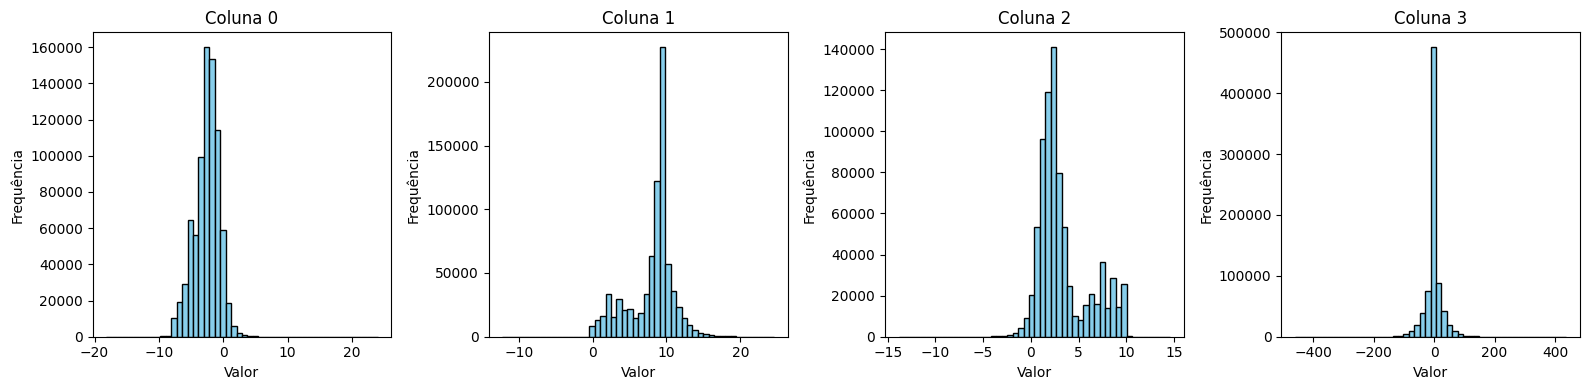

In [91]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    axs[i].hist(combined_data[:, i], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Coluna {i}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

- Kolmogorov-Smirnov

In [92]:
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']
activity_labels = [1, 2, 3, 4]

print("=== Kolmogorov–Smirnov test for normality ===\n")

for label, name in zip(activity_labels, activity_names):
    activity_data = combined_data[combined_data[:, 3] == label]

    acc = activity_data[:, 0]
    gyr = activity_data[:, 1]
    mag = activity_data[:, 2]

    acc = (acc - np.mean(acc)) / np.std(acc)
    gyr = (gyr - np.mean(gyr)) / np.std(gyr)
    mag = (mag - np.mean(mag)) / np.std(mag)

    ks_acc = kstest(acc, 'norm')
    ks_gyr = kstest(gyr, 'norm')
    ks_mag = kstest(mag, 'norm')

    print(f"Activity: {name}")
    print(f"  Accelerometer: statistic={ks_acc.statistic:.4f}, p-value={ks_acc.pvalue:.4e}")
    print(f"  Gyroscope:     statistic={ks_gyr.statistic:.4f}, p-value={ks_gyr.pvalue:.4e}")
    print(f"  Magnetometer:  statistic={ks_mag.statistic:.4f}, p-value={ks_mag.pvalue:.4e}\n")

=== Kolmogorov–Smirnov test for normality ===

Activity: Stand
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan

Activity: Sit
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan

Activity: Sit and Talk
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan

Activity: Walk
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan



c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in s

- Shapiro-Wilk

In [93]:
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']
activity_labels = [1, 2, 3, 4]

print("=== Shapiro–Wilk test for normality ===\n")

for label, name in zip(activity_labels, activity_names):
    activity_data = combined_data[combined_data[:, 3] == label]

    acc = activity_data[:, 0]
    gyr = activity_data[:, 1]
    mag = activity_data[:, 2]

    sh_acc = shapiro(acc)
    sh_gyr = shapiro(gyr)
    sh_mag = shapiro(mag)

    print(f"Activity: {name}")
    print(f"  Accelerometer: statistic={sh_acc.statistic:.4f}, p-value={sh_acc.pvalue:.4e}")
    print(f"  Gyroscope:     statistic={sh_gyr.statistic:.4f}, p-value={sh_gyr.pvalue:.4e}")
    print(f"  Magnetometer:  statistic={sh_mag.statistic:.4f}, p-value={sh_mag.pvalue:.4e}\n")


=== Shapiro–Wilk test for normality ===

Activity: Stand
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan

Activity: Sit
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan

Activity: Sit and Talk
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan

Activity: Walk
  Accelerometer: statistic=nan, p-value=nan
  Gyroscope:     statistic=nan, p-value=nan
  Magnetometer:  statistic=nan, p-value=nan



C:\Users\Miguel António\AppData\Local\Temp\ipykernel_17224\2966334703.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  sh_acc = shapiro(acc)
C:\Users\Miguel António\AppData\Local\Temp\ipykernel_17224\2966334703.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  sh_gyr = shapiro(gyr)
C:\Users\Miguel António\AppData\Local\Temp\ipykernel_17224\2966334703.py:15: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  sh_mag = shapiro(mag)


- Kruskal-Wallis H-test 

In [94]:
activity_labels = [1, 2, 3, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

print("=== Kruskal–Wallis Test for Mean Differences Across Activities ===\n")

for i, sensor_name in enumerate(['|a| (Accelerometer)', '|g| (Gyroscope)', '|m| (Magnetometer)']):
    groups = [combined_data[combined_data[:,3] == label][:, i] for label in activity_labels]

    stat, p = kruskal(*groups)
    print(f"{sensor_name}: statistic={stat:.4f}, p-value={p:.4e}")

    if p < 0.05:
        print("  → Diferença estatisticamente significativa entre as médias das atividades.")
    else:
        print("  → Não há diferença significativa.\n")
    print()


=== Kruskal–Wallis Test for Mean Differences Across Activities ===

|a| (Accelerometer): statistic=nan, p-value=nan
  → Não há diferença significativa.


|g| (Gyroscope): statistic=nan, p-value=nan
  → Não há diferença significativa.


|m| (Magnetometer): statistic=nan, p-value=nan
  → Não há diferença significativa.




C:\Users\Miguel António\AppData\Local\Temp\ipykernel_17224\4283433160.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = kruskal(*groups)


## 4.2 - Extract Temporal and Spectral Features

- combined_data with (x,y,z)

In [95]:
combined_data = []

for person_data in individuals:
    ax, ay, az = person_data[:, 1], person_data[:, 2], person_data[:, 3]
    gx, gy, gz = person_data[:, 4], person_data[:, 5], person_data[:, 6]
    mx, my, mz = person_data[:, 7], person_data[:, 8], person_data[:, 9]
    activity_label = person_data[:, 11]
    
    combined = np.column_stack((ax, ay, az, gx, gy, gz, mx, my, mz, activity_label))
    combined_data.append(combined)

combined_data = np.vstack(combined_data)

print("combined_data shape:", combined_data.shape)
print("Exemplo:", combined_data[0])

combined_data shape: (794257, 10)
Exemplo: [-1.865    9.389    2.5812  -1.1418  -1.1856   0.84998 -0.34476  0.59839
  1.0134   1.     ]


- only for accelerometer and gyroscope (as the article) -  with modules of the vectors

In [ ]:
'''import numpy as np
import pandas as pd
from scipy import stats
from scipy.fft import rfft, rfftfreq

# =============================================
# === AUXILIARY FUNCTIONS =====================
# =============================================

def zero_cross_rate(x):
    return np.sum(np.diff(np.sign(x)) != 0) / len(x)

def mean_cross_rate(x):
    mean_val = np.mean(x)
    return np.sum(np.diff(np.sign(x - mean_val)) != 0) / len(x)

def spectral_entropy(x, fs):
    X = np.abs(rfft(x))
    psd = X**2
    psd /= np.sum(psd)
    return -np.sum(psd * np.log2(psd + 1e-12))

def dominant_frequency(x, fs):
    X = np.abs(rfft(x))
    freqs = rfftfreq(len(x), 1/fs)
    return freqs[np.argmax(X[1:])]

def energy(x):
    X = np.abs(rfft(x))
    return np.sum(X**2) / len(x)


# =============================================
# === FEATURE EXTRACTION FUNCTIONS ============
# =============================================

def extract_statistical_features(signal, fs):
    """
    Extrai features estatísticas e espectrais de um sinal 1D.
    """
    x = signal
    feats = [
        np.mean(x),
        np.median(x),
        np.std(x),
        np.var(x),
        np.sqrt(np.mean(x**2)),        # RMS
        np.mean(np.diff(x)),           # mean diff
        stats.skew(x),
        stats.kurtosis(x),
        np.percentile(x, 75) - np.percentile(x, 25),  # IQR
        zero_cross_rate(x),
        mean_cross_rate(x),
        spectral_entropy(x, fs),
        dominant_frequency(x, fs),
        energy(x)
    ]
    return np.array(feats)


def extract_physical_features(acc, gyro, fs):
    """
    Extrai features físicas (AI, VI, SMA, EVA, etc.)
    acc e gyro devem ser arrays Nx3 (3 eixos ou duplicados)
    """
    # AI e VI
    MI = np.linalg.norm(acc, axis=1)
    AI = np.mean(MI)
    VI = np.var(MI)

    # SMA
    SMA = np.mean(np.sum(np.abs(acc), axis=1))

    # Eigenvalues (EVA)
    cov = np.cov(acc.T)
    eigvals = np.sort(np.linalg.eigvals(cov))[::-1][:2]

    # CAGH (corr entre gravidade e heading)
    gravity = acc[:, 0]
    heading = np.linalg.norm(acc[:, 1:3], axis=1)
    CAGH = np.corrcoef(gravity, heading)[0, 1]

    # AVH, AVG (velocidades integradas)
    dt = 1/fs
    vel_y = np.cumsum(acc[:, 1]) * dt
    vel_z = np.cumsum(acc[:, 2]) * dt
    AVH = np.mean(np.sqrt(vel_y**2 + vel_z**2))
    vel_x = np.cumsum(acc[:, 0]) * dt
    AVG = np.mean(vel_x)

    # ARATG (ângulo rotacional acumulado)
    rot_angle = np.cumsum(gyro[:, 0]) * dt
    ARATG = np.mean(rot_angle)

    # DF, ENERGY, AAE, ARE
    DF_acc = dominant_frequency(MI, fs)
    ENERGY_acc = energy(MI)
    AAE = np.mean([energy(acc[:, i]) for i in range(3)])
    ARE = np.mean([energy(gyro[:, i]) for i in range(3)])

    return np.array([AI, VI, SMA, *eigvals, CAGH, AVH, AVG, ARATG,
                     DF_acc, ENERGY_acc, AAE, ARE])


def extract_features_from_window(acc_signal, gyro_signal, fs):
    """
    Extrai todas as features (estatísticas + físicas) para um par (acc, gyro).
    """
    # Estatísticas para acc e gyro
    stat_acc = extract_statistical_features(acc_signal, fs)
    stat_gyro = extract_statistical_features(gyro_signal, fs)

    # Físicas requerem arrays Nx3 — duplicamos o eixo
    acc_3d = np.column_stack([acc_signal, acc_signal, acc_signal])
    gyro_3d = np.column_stack([gyro_signal, gyro_signal, gyro_signal])

    phys = extract_physical_features(acc_3d, gyro_3d, fs)

    return np.concatenate([stat_acc, stat_gyro, phys])


# =============================================
# === SEGMENTATION FUNCTION ==================
# =============================================

def segment_data_combined(combined_matrix, fs=50, win_time=5, overlap=0.5):
    """
    Divide o dataset em janelas de 5 s (com overlap) homogéneas por atividade.
    combined_matrix: np.array [acc_mag, gyro_mag, activity]
    """
    data = combined_matrix[:, :2]    # acc_mag, gyro_mag
    labels = combined_matrix[:, -1]  # activity

    win_len = int(win_time * fs)
    step = int(win_len * (1 - overlap))
    segments = []

    for start in range(0, len(data) - win_len + 1, step):
        end = start + win_len
        seg_labels = labels[start:end]
        if np.all(seg_labels == seg_labels[0]):  # janela homogénea
            segments.append((data[start:end], seg_labels[0]))

    return segments


# =============================================
# === MAIN PIPELINE ===========================
# =============================================

fs = 50  # Hz
segments = segment_data_combined(combined_data, fs=fs, win_time=5, overlap=0.5)

print(f"Número total de janelas válidas: {len(segments)}")

feature_vectors = []
labels = []

for seg_data, seg_label in segments:
    acc_signal = seg_data[:, 0]
    gyro_signal = seg_data[:, 1]

    feat = extract_features_from_window(acc_signal, gyro_signal, fs)
    feature_vectors.append(feat)
    labels.append(seg_label)

X = np.vstack(feature_vectors)
y = np.array(labels)

print("Shape final de X:", X.shape)
print("Shape de y:", y.shape)
'''

Número total de janelas válidas: 5663
Shape final de X: (5663, 41)
Shape de y: (5663,)


- 41 features per window (using the modules)

- 139 features per window (using x,y,z)

In [111]:
# =============================================
# === AUXILIARY FUNCTIONS =====================
# =============================================

def zero_cross_rate(x):
    return np.sum(np.diff(np.sign(x)) != 0) / len(x)

def mean_cross_rate(x):
    mean_val = np.mean(x)
    return np.sum(np.diff(np.sign(x - mean_val)) != 0) / len(x)

def spectral_entropy(x, fs):
    X = np.abs(rfft(x))
    psd = X**2
    psd /= np.sum(psd)
    return -np.sum(psd * np.log2(psd + 1e-12))

def dominant_frequency(x, fs):
    X = np.abs(rfft(x))
    freqs = rfftfreq(len(x), 1/fs)
    return freqs[np.argmax(X[1:])]  # ignora o DC

def energy(x):
    X = np.abs(rfft(x))
    return np.sum(X**2) / len(x)


# =============================================
# === FEATURE EXTRACTION FUNCTIONS ============
# =============================================

def extract_statistical_features(signal, fs):
    """Extrai features estatísticas e espectrais de um sinal 1D."""
    x = signal
    feats = [
        np.mean(x),
        np.median(x),
        np.std(x),
        np.var(x),
        np.sqrt(np.mean(x**2)),          # RMS
        np.mean(np.diff(x)),             # mean diff
        stats.skew(x),
        stats.kurtosis(x),
        np.percentile(x, 75) - np.percentile(x, 25),  # IQR
        zero_cross_rate(x),
        mean_cross_rate(x),
        spectral_entropy(x, fs),
        dominant_frequency(x, fs),
        energy(x)
    ]
    return np.array(feats)


def extract_physical_features(acc, gyro, fs):
    """
    Extrai features físicas (AI, VI, SMA, EVA, etc.)
    acc e gyro devem ser arrays Nx3 (3 eixos)
    """
    MI = np.linalg.norm(acc, axis=1)
    AI = np.mean(MI)
    VI = np.var(MI)
    SMA = np.mean(np.sum(np.abs(acc), axis=1))

    # Eigenvalues (EVA)
    cov = np.cov(acc.T)
    eigvals = np.sort(np.linalg.eigvals(cov))[::-1][:2]

    # Correlação entre gravidade e heading (CAGH)
    gravity = acc[:, 0]
    heading = np.linalg.norm(acc[:, 1:3], axis=1)
    CAGH = np.corrcoef(gravity, heading)[0, 1]

    # AVH, AVG (velocidades integradas)
    dt = 1/fs
    vel_y = np.cumsum(acc[:, 1]) * dt
    vel_z = np.cumsum(acc[:, 2]) * dt
    AVH = np.mean(np.sqrt(vel_y**2 + vel_z**2))
    vel_x = np.cumsum(acc[:, 0]) * dt
    AVG = np.mean(vel_x)

    # ARATG (ângulo rotacional acumulado)
    rot_angle = np.cumsum(gyro[:, 0]) * dt
    ARATG = np.mean(rot_angle)

    # DF, ENERGY, AAE, ARE
    DF_acc = dominant_frequency(MI, fs)
    ENERGY_acc = energy(MI)
    AAE = np.mean([energy(acc[:, i]) for i in range(3)])
    ARE = np.mean([energy(gyro[:, i]) for i in range(3)])

    return np.array([AI, VI, SMA, *eigvals, CAGH, AVH, AVG, ARATG,
                     DF_acc, ENERGY_acc, AAE, ARE])


def extract_features_from_window_9d(window, fs):
    """
    Extrai todas as features (estatísticas + físicas) de uma janela (N x 9)
    """
    features_all = []

    # === Estatísticas individuais (ax..mz)
    for i in range(9):
        signal = window[:, i]
        feats = extract_statistical_features(signal, fs)
        features_all.extend(feats)

    # === Físicas (usam apenas aceleração e giroscópio reais)
    acc = window[:, 0:3]
    gyro = window[:, 3:6]
    phys = extract_physical_features(acc, gyro, fs)
    features_all.extend(phys)

    return np.array(features_all)


# =============================================
# === SEGMENTATION FUNCTION ==================
# =============================================

def segment_data_combined(combined_matrix, fs=50, win_time=5, overlap=0.5):
    """
    Divide o dataset em janelas de 'win_time' segundos (com overlap) homogéneas por atividade.
    combined_matrix: np.array [ax..mz, activity_label]
    """
    data = combined_matrix[:, :9]     # 9 features dos sensores
    labels = combined_matrix[:, 9]    # coluna 9 = label

    win_len = int(win_time * fs)
    step = int(win_len * (1 - overlap))
    segments = []

    for start in range(0, len(data) - win_len + 1, step):
        end = start + win_len
        seg_labels = labels[start:end]
        if np.all(seg_labels == seg_labels[0]):  # janela homogénea
            segments.append((data[start:end, :], seg_labels[0]))

    return segments


# =============================================
# === MAIN PIPELINE ===========================
# =============================================

fs = 50  # Hz
segments = segment_data_combined(combined_data, fs=fs, win_time=5, overlap=0.5)

print(f"Número total de janelas válidas: {len(segments)}")

feature_vectors = []
labels = []

for seg_data, seg_label in segments:
    feat = extract_features_from_window_9d(seg_data, fs)
    feature_vectors.append(feat)
    labels.append(seg_label)

X = np.vstack(feature_vectors)
y = np.array(labels)

print("Shape final de X:", X.shape)
print("Shape de y:", y.shape)


Número total de janelas válidas: 5663
Shape final de X: (5663, 139)
Shape de y: (5663,)


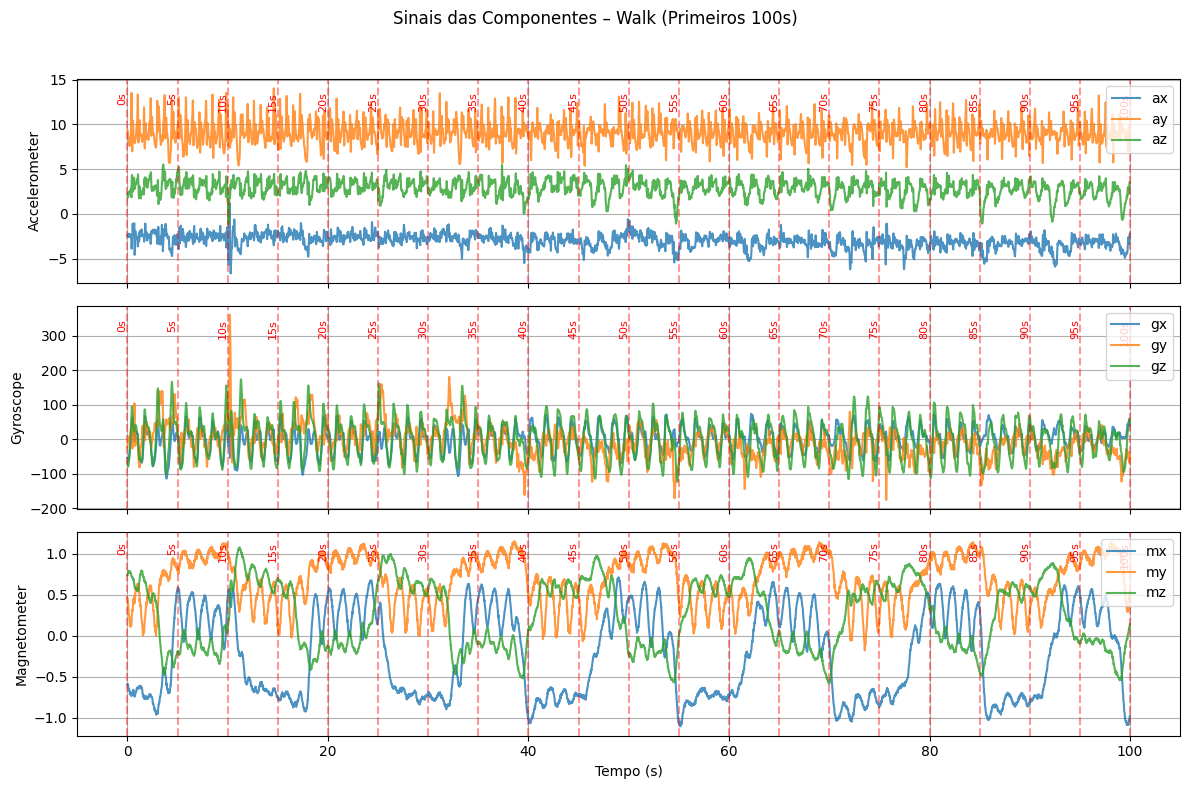

In [112]:
# ============================================
# Parâmetros
# ============================================
activity_label = 4     # 4 = Walk
activity_name = 'Walk'
fs = 50                # frequência de amostragem (Hz)
duration_s = 100       # segundos a visualizar
window_s = 5           # tamanho da janela (s)

# ============================================
# Selecionar amostras dessa atividade
# ============================================
mask = combined_data[:, 9] == activity_label   # coluna 9 = activity_label
data = combined_data[mask]

n_samples = int(duration_s * fs)
n_samples = min(n_samples, len(data))

# Extrair componentes (em vez dos módulos)
ax, ay, az = data[:n_samples, 0], data[:n_samples, 1], data[:n_samples, 2]
gx, gy, gz = data[:n_samples, 3], data[:n_samples, 4], data[:n_samples, 5]
mx, my, mz = data[:n_samples, 6], data[:n_samples, 7], data[:n_samples, 8]

time = np.arange(n_samples) / fs

# ============================================
# Plot (componentes individuais)
# ============================================
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Acelerómetro
axs[0].plot(time, ax, label='ax', alpha=0.8)
axs[0].plot(time, ay, label='ay', alpha=0.8)
axs[0].plot(time, az, label='az', alpha=0.8)
axs[0].set_ylabel("Accelerometer")
axs[0].legend(loc='upper right')
axs[0].grid(True)

# Giroscópio
axs[1].plot(time, gx, label='gx', alpha=0.8)
axs[1].plot(time, gy, label='gy', alpha=0.8)
axs[1].plot(time, gz, label='gz', alpha=0.8)
axs[1].set_ylabel("Gyroscope")
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Magnetómetro
axs[2].plot(time, mx, label='mx', alpha=0.8)
axs[2].plot(time, my, label='my', alpha=0.8)
axs[2].plot(time, mz, label='mz', alpha=0.8)
axs[2].set_ylabel("Magnetometer")
axs[2].set_xlabel("Tempo (s)")
axs[2].legend(loc='upper right')
axs[2].grid(True)

# Linhas verticais a cada janela
for t in np.arange(0, duration_s + window_s, window_s):
    for ax in axs:
        ax.axvline(x=t, color='red', linestyle='--', alpha=0.4)
        ax.text(t, ax.get_ylim()[1]*0.9, f"{int(t)}s", color='red',
                rotation=90, va='top', ha='right', fontsize=8)

fig.suptitle(f"Sinais das Componentes – {activity_name} (Primeiros {duration_s}s)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4.3 - PCA

In [113]:
def pca_from_scratch(data,n_components):
    mean = np.mean(data,axis=0)
    centered_data = data-mean

    covariance_matrix = np.cov(centered_data,rowvar=False)

    eigenvalues,eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]

    principal_components = eigenvectors[:,:n_components]

    transformed_data = np.dot(centered_data,principal_components)

    return transformed_data,principal_components,eigenvalues

In [ ]:
n_components = 3

X_pca, principal_components, eigenvalues = pca_from_scratch(X, n_components)

print("Shape original:", X.shape)
print("Shape após PCA:", X_pca.shape)
print("\nEigenvalues: ",eigenvalues)

Shape original: (5663, 139)
Shape após PCA: (5663, 3)

Eigenvalues:  [ 4.51403485e+11  4.24210863e+10  1.04276444e+10  8.17767073e+07
  8.14763014e+06  1.09757299e+06  4.40980200e+05  3.19984572e+04
  1.35537958e+04  1.07441533e+04  6.44084020e+03  2.12775482e+03
  1.02294509e+03  6.46123983e+02  5.37853028e+02  1.63374048e+02
  1.56219879e+02  1.25449419e+02  1.11675992e+02  7.95281881e+01
  6.28648433e+01  4.80005288e+01  3.87807375e+01  3.68726134e+01
  3.47269968e+01  2.04534447e+01  1.65374415e+01  1.28289785e+01
  1.19204439e+01  1.00519635e+01  9.69728681e+00  7.28489952e+00
  6.98921271e+00  6.39599953e+00  5.72115864e+00  5.03480835e+00
  4.62617084e+00  3.72370365e+00  3.53016327e+00  3.29246378e+00
  2.75468759e+00  2.67305790e+00  2.45472014e+00  1.76477985e+00
  1.49703200e+00  1.03341807e+00  9.95851216e-01  8.71230115e-01
  8.14026356e-01  7.99123960e-01  7.42428952e-01  6.61938584e-01
  5.36480825e-01  5.16298680e-01  4.93797194e-01  4.52750845e-01
  4.33107783e-01  3.9

## 4.4 - Importance of each principal component